In [375]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [99]:
pwd

'C:\\Users\\tusha\\Documents\\Data Science Course\\ML\\ML Day 5'

In [100]:
df=pd.read_excel('C:\\Users\\tusha\\Documents\\Data Science Course\\ML\\ML Day 5\\default of credit card clients.xls')

In [101]:
Data Set Information:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability 
of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the 
estimated probability of default will be more valuable than the binary result of classification - credible or not credible 
clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ 
to estimate the real probability of default. With the real probability of default as the response variable (Y), and the 
predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that 
the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression 
intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, 
artificial neural network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. 
This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) 
    credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;
X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 
1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 
9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005;
    X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 
2005; . . .;X23 = amount paid in April, 2005.



SyntaxError: invalid syntax (658236516.py, line 1)

In [102]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [103]:
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [105]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [106]:
df['X3']

0        EDUCATION
1                2
2                2
3                2
4                2
           ...    
29996            3
29997            3
29998            2
29999            3
30000            2
Name: X3, Length: 30001, dtype: object

In [107]:
df['X2'].unique()

array(['SEX', 2, 1], dtype=object)

In [108]:
df['X3'].unique()

array(['EDUCATION', 2, 1, 3, 5, 4, 6, 0], dtype=object)

In [122]:
df.drop(columns='Unnamed: 0',inplace=True)

In [124]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [150]:
data=df[1::]

In [151]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30000 non-null  object
 1   X2      30000 non-null  object
 2   X3      30000 non-null  object
 3   X4      30000 non-null  object
 4   X5      30000 non-null  object
 5   X6      30000 non-null  object
 6   X7      30000 non-null  object
 7   X8      30000 non-null  object
 8   X9      30000 non-null  object
 9   X10     30000 non-null  object
 10  X11     30000 non-null  object
 11  X12     30000 non-null  object
 12  X13     30000 non-null  object
 13  X14     30000 non-null  object
 14  X15     30000 non-null  object
 15  X16     30000 non-null  object
 16  X17     30000 non-null  object
 17  X18     30000 non-null  object
 18  X19     30000 non-null  object
 19  X20     30000 non-null  object
 20  X21     30000 non-null  object
 21  X22     30000 non-null  object
 22  X23     30000 non-null

In [153]:
data=data.astype(int)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int32
 1   X2      30000 non-null  int32
 2   X3      30000 non-null  int32
 3   X4      30000 non-null  int32
 4   X5      30000 non-null  int32
 5   X6      30000 non-null  int32
 6   X7      30000 non-null  int32
 7   X8      30000 non-null  int32
 8   X9      30000 non-null  int32
 9   X10     30000 non-null  int32
 10  X11     30000 non-null  int32
 11  X12     30000 non-null  int32
 12  X13     30000 non-null  int32
 13  X14     30000 non-null  int32
 14  X15     30000 non-null  int32
 15  X16     30000 non-null  int32
 16  X17     30000 non-null  int32
 17  X18     30000 non-null  int32
 18  X19     30000 non-null  int32
 19  X20     30000 non-null  int32
 20  X21     30000 non-null  int32
 21  X22     30000 non-null  int32
 22  X23     30000 non-null  int32
 23  Y       300

In [155]:
data['X3']=data['X3'].map({1:1,2:2,3:3,4:4,5:4,6:4,0:4})

In [156]:
data['X3'].unique()
#X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

array([2, 1, 3, 4], dtype=int64)

In [157]:
data['X2'].unique()
#X2: Gender (1 = male; 2 = female).

array([2, 1])

In [158]:
data['X4'].unique()
#X4: Marital status (1 = married; 2 = single; 3 = others)

array([1, 2, 3, 0])

In [159]:
data['X4'].value_counts()

2    15964
1    13659
3      323
0       54
Name: X4, dtype: int64

In [160]:
data['X4']=data['X4'].map({1:1,2:2,3:3,0:1})

In [213]:
data['X4'].unique()
#X4: Marital status (1 = married; 2 = single; 3 = others)

array([1, 2, 3], dtype=int64)

In [219]:
d=list(data.columns)

In [220]:
d

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'Y']

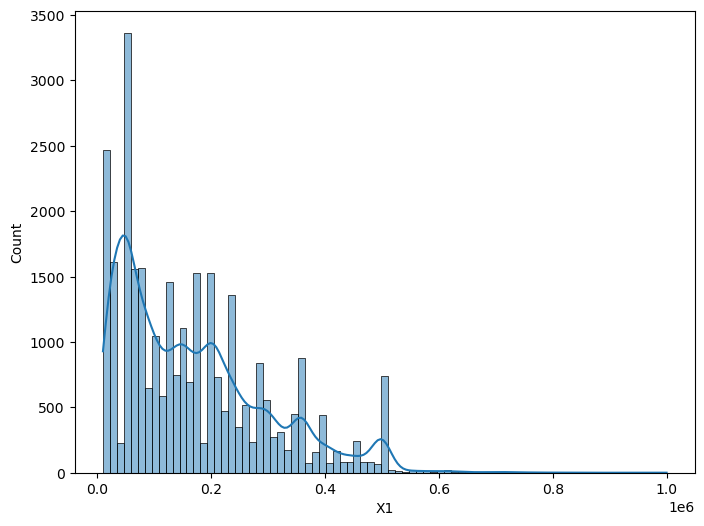

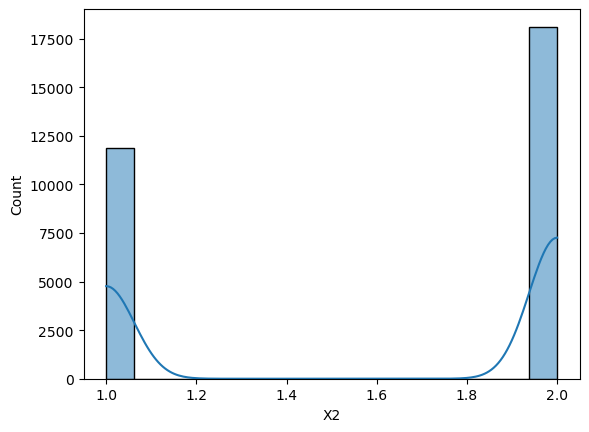

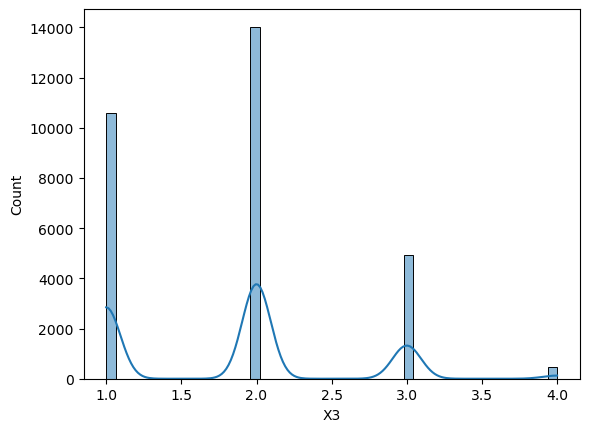

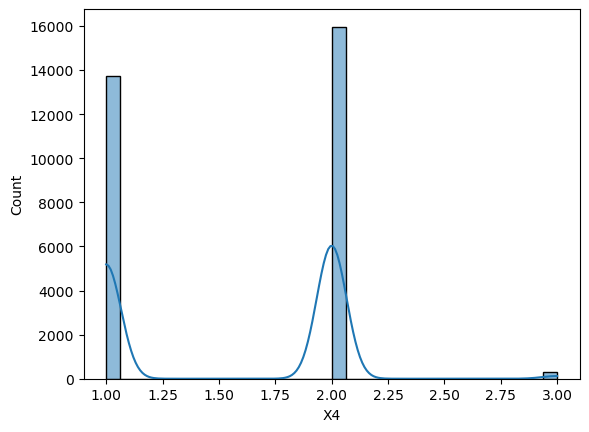

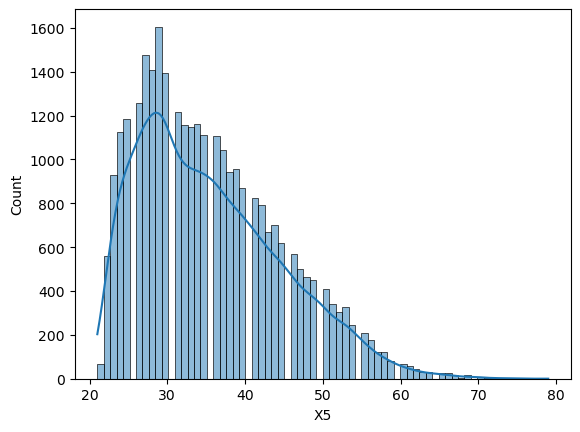

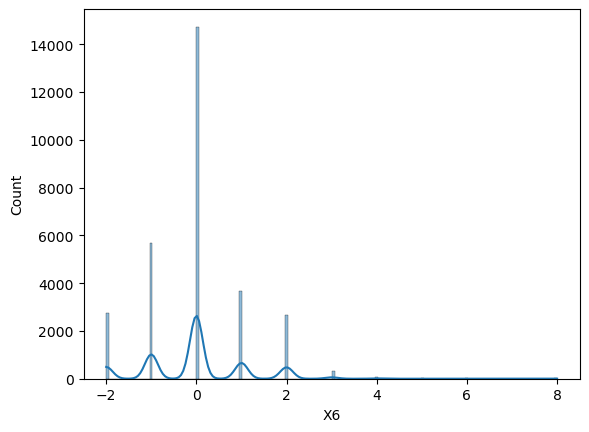

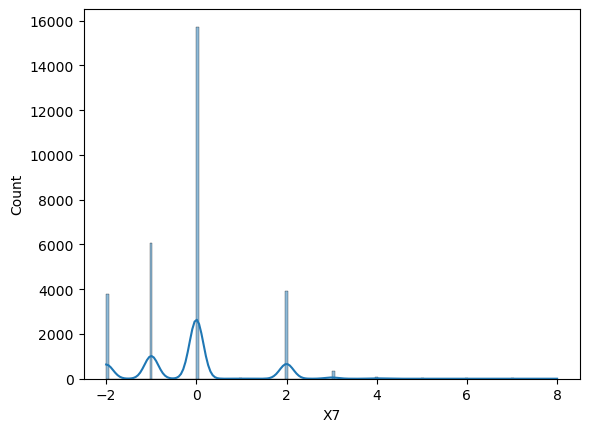

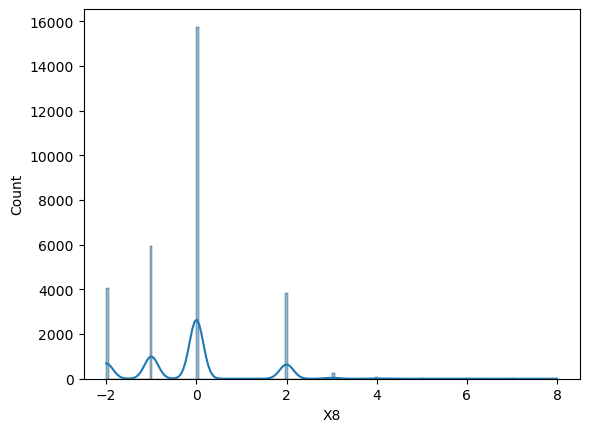

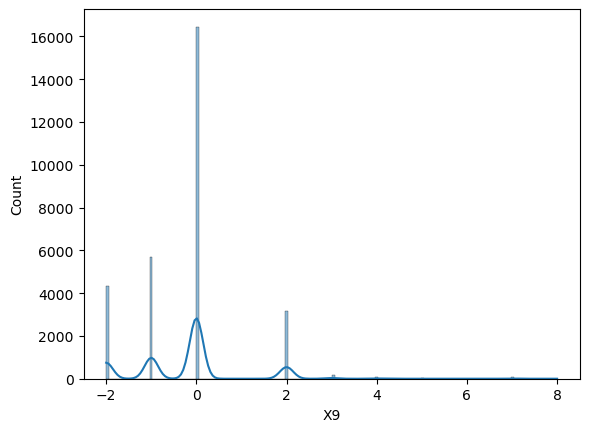

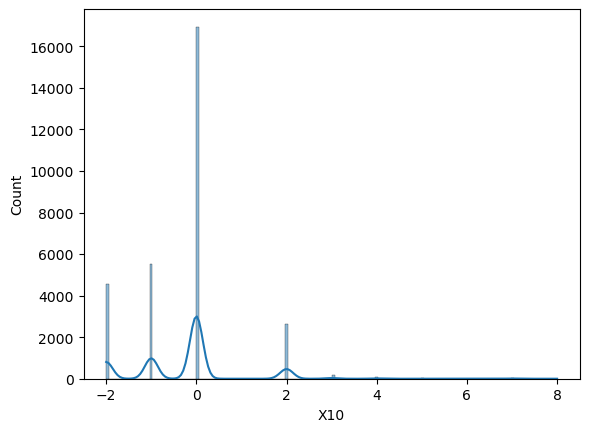

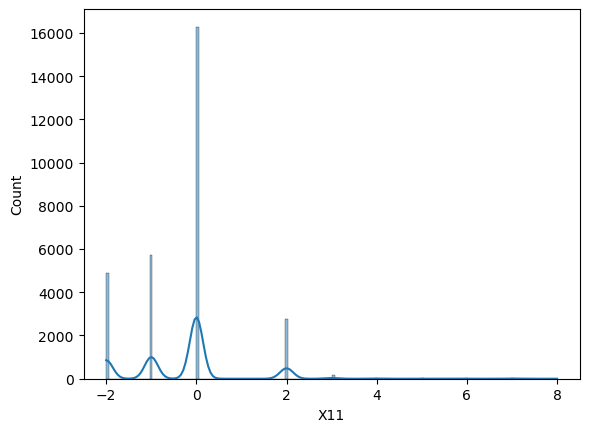

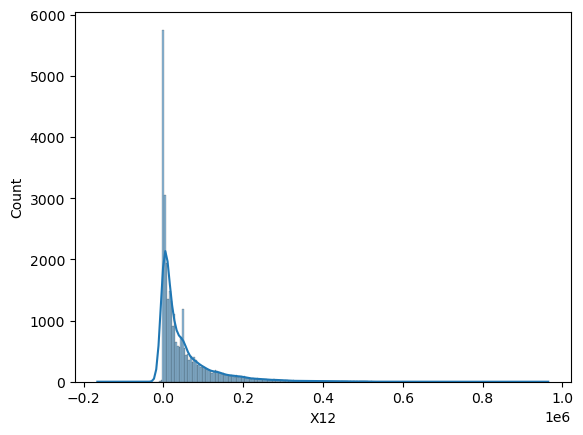

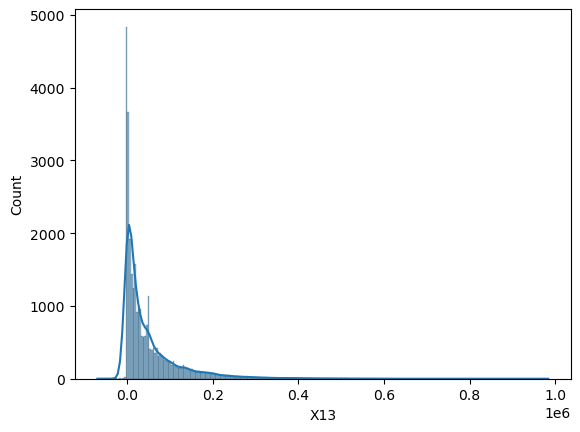

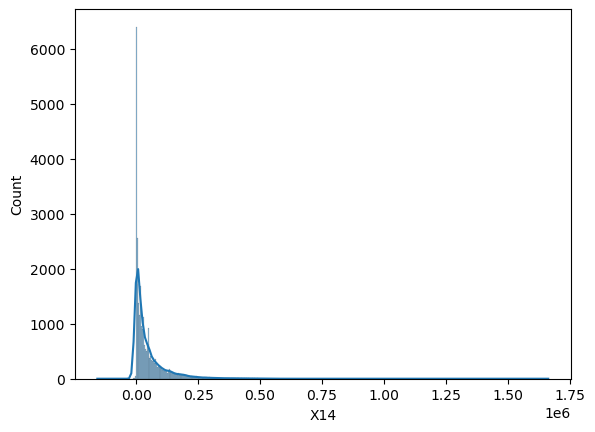

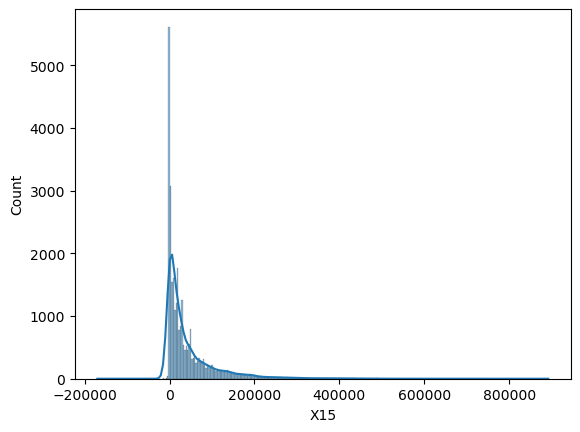

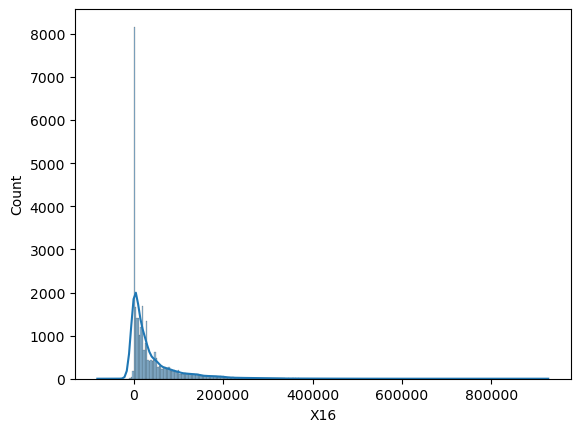

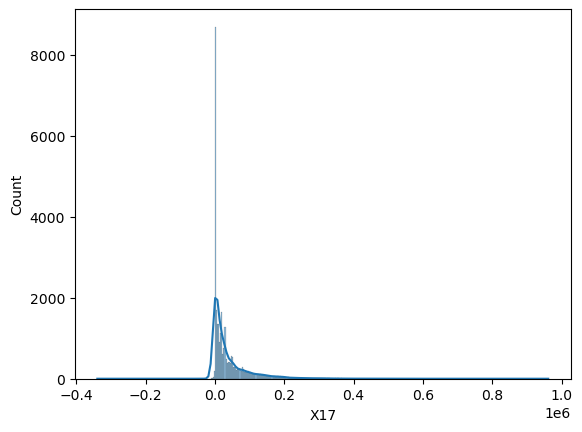

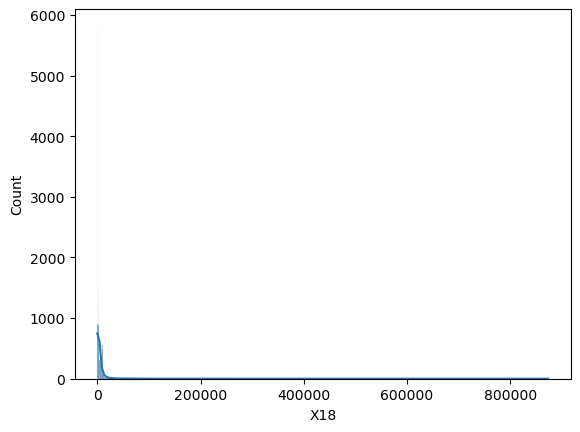

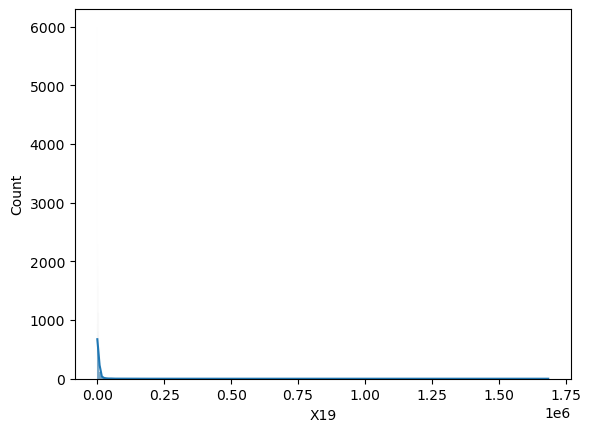

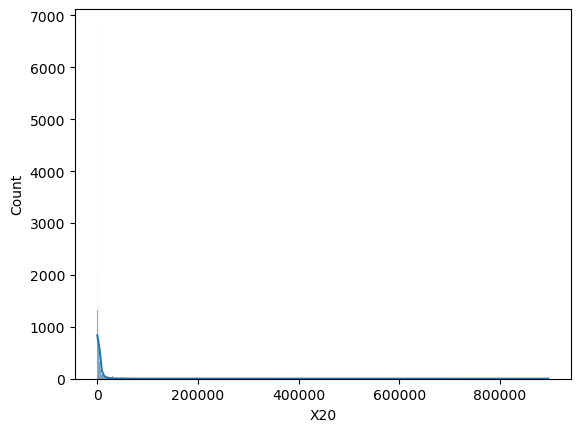

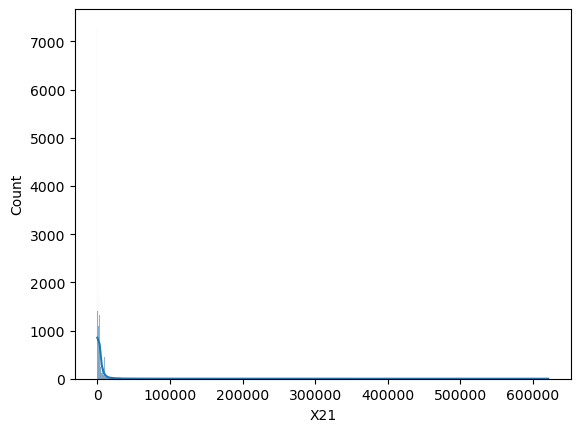

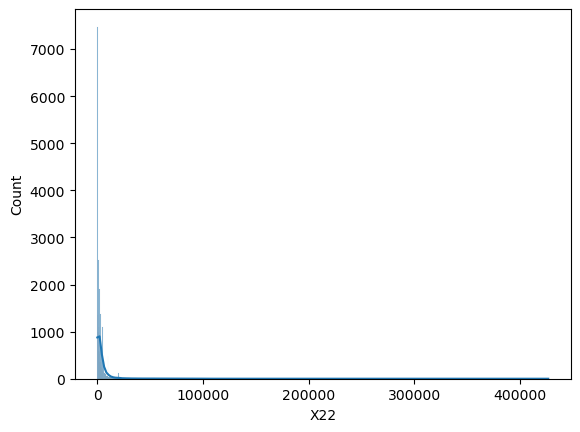

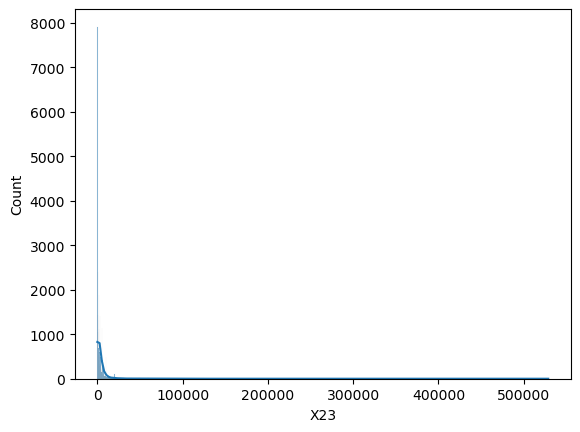

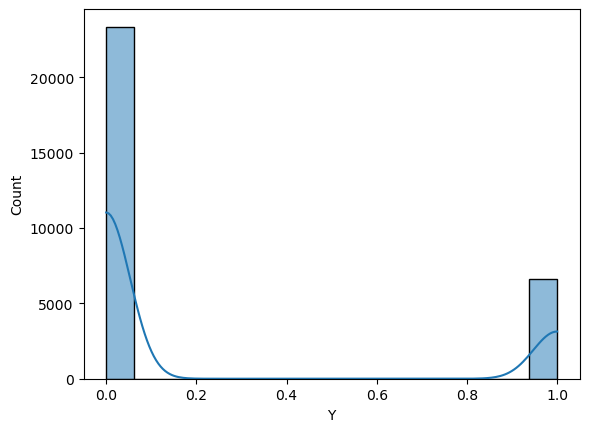

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in d:
    sns.histplot(data=data,x=i,kde=True)
    print('\n')
    plt.show()

In [163]:
X = data.drop(labels=['Y'],axis=1)
Y= data[['Y']]

In [164]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29999,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [165]:
Y

,Y
1,1
2,1
3,0
4,0
5,0
...,...
29996,0
29997,0
29998,1
29999,1


In [277]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=42)

In [278]:
X_train.shape

(18000, 23)

In [279]:
X_test.shape

(12000, 23)

In [280]:
y_train

,Y
2759,0
11338,0
23150,0
19040,1
10803,1
...,...
29803,0
5391,1
861,0
15796,1


In [281]:
y_train=np.ravel(y_train)

In [282]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [380]:
model=LogisticRegression(max_iter=1000)


In [381]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [382]:
#model=LogisticRegression()

In [383]:
#you are training your model here
model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [384]:
model.score(X_train_scaled,y_train)

0.8105555555555556

In [385]:
y_pred=model.predict(X_test_scaled)

In [386]:
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8085


In [387]:
accuracy_score(y_test,y_pred)

0.8085

In [388]:
confusion_matrix(y_test,y_pred)

array([[9081,  276],
       [2022,  621]], dtype=int64)

In [389]:
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'solver': [ 'saga']
}

In [390]:
# Create a grid search object with the model and hyperparameters
grid_search = GridSearchCV(model, hyperparameters, cv=5, scoring=make_scorer(accuracy_score))



In [391]:
# Fit the grid search object to the training data
grid_search.fit(X_train_scaled, y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'], 'solver': ['saga']},
             scoring=make_scorer(accuracy_score))

In [392]:
# Print the best hyperparameters found
print('Best hyperparameters:', grid_search.best_params_)



Best hyperparameters: {'C': 10, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'saga'}


In [393]:
# Evaluate the performance of the best model on the test data
y_pred = grid_search.predict(X_test_scaled)


In [394]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8084166666666667


In [396]:
# Perform 5-fold cross-validation and compute scores
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

# Print all scores
print("All scores:", scores)


All scores: [0.81444444 0.80416667 0.81111111 0.81527778 0.80388889]
